## Loading the data

#### 1. Customers Data

In [3]:
import pandas as pd

# Read the Excel file
customers = pd.read_excel('customer_data.xlsx')

# Display the head of the dataframe
customers.head()

,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,Last Contact,...,Foreign Currency Account,Business Lending,Properties Owned,Fees,Days with Bank,Relationship Time Frame,Income Band,Risk Weighting,Location ID_1,Customer ID
0,Margaret Carroll,24,Male,313,1996-06-17,Shawn Long,European,Engineer II,Carl Anderson,2016-07-17,...,54201,770875,3,0.02,9768,> 20 Years,Mid-High,2,313,KEY55471
1,Joshua Webb,34,Male,501,1993-09-08,Douglas Tucker,European,Web Developer I,Carl Anderson,2015-11-28,...,59924,634312,2,0.02,10781,> 20 Years,Mid-High,2,501,KEY88784
2,Kevin Ellis,82,Male,899,2012-03-25,Anthony Simpson,European,Computer Systems Analyst II,Fred Bryant,2015-08-20,...,19652,424460,3,0.02,4008,20 Years,Mid-High,2,899,KEY17543
3,Victor Moreno,29,Male,2147,1998-11-23,Frank Brown,European,Quality Control Specialist,Peter Castillo,2015-08-15,...,46235,695694,2,0.01,8879,> 20 Years,Mid-High,2,2147,KEY13907
4,Louis Ramirez,45,Male,2764,1995-01-01,Shawn Cook,European,Office Assistant I,Ernest Knight,2015-10-09,...,16707,357398,1,0.02,10301,> 20 Years,Mid-High,2,2764,KEY41067


#### 2. Location Data

In [4]:
# Read the Excel file
location = pd.read_excel('location.xlsx')

# Display the head of the dataframe
location.head()

,Location ID,Street,Suburb,postcode,Longitude,Latitude,Full Address,City
0,163,NaN,Dagoretti North,20517,36.80897,-1.29467,DAGORETTI NORTH,Nairobi
1,449,NaN,Westlands,43457,36.74795,-1.26379,WESTLANDS,Nairobi
2,547,NaN,Westlands,71582,36.75793,-1.26735,WESTLANDS,Nairobi
3,785,NaN,Westlands,71830,36.82461,-1.26237,WESTLANDS,Nairobi
4,1033,NaN,Mathare,48159,36.80472,-1.24541,MATHARE,Nairobi


## Joining the Tables

In [5]:
# Merge merged_bank_location with customers dataset on Location ID and Customer ID
merged_dataset  = pd.merge(customers, location, on='Location ID')

In [26]:
# Display the head of the final merged dataset
merged_dataset.head()

,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,Last Contact,...,Risk Weighting,Location ID_1,Customer ID,Street,Suburb,postcode,Longitude,Latitude,Full Address,City
0,Margaret Carroll,24,Male,313,1996-06-17,Shawn Long,European,Engineer II,Carl Anderson,2016-07-17,...,2,313,KEY55471,Nakuru Town,Nakuru,23269,36.04388,-0.232850,NAKURU TOWN,Nakuru
1,Joshua Webb,34,Male,501,1993-09-08,Douglas Tucker,European,Web Developer I,Carl Anderson,2015-11-28,...,2,501,KEY88784,Othaya Town,Nyeri South,28716,36.92640,-0.558127,OTHAYA,Nyeri
2,Kevin Ellis,82,Male,899,2012-03-25,Anthony Simpson,European,Computer Systems Analyst II,Fred Bryant,2015-08-20,...,2,899,KEY17543,Malindi,Magarini,66865,39.98014,-2.839760,MAGARINI,Kilifi
3,Victor Moreno,29,Male,2147,1998-11-23,Frank Brown,European,Quality Control Specialist,Peter Castillo,2015-08-15,...,2,2147,KEY13907,Kitale,Trans Nzoia West,23063,35.00263,1.012900,SABOTI,Trans Nzoia
4,Louis Ramirez,45,Male,2764,1995-01-01,Shawn Cook,European,Office Assistant I,Ernest Knight,2015-10-09,...,2,2764,KEY41067,Litein Town,Bureti,39677,35.19104,-0.581290,BURET,Kericho


## Understanding the Merged Data

In [27]:
# List of columns with their data types
merged_dataset.dtypes

Name                                object
Age                                  int64
Sex                                 object
Location ID                          int64
Joined Bank                 datetime64[ns]
Banking Contact                     object
Nationality                         object
Occupation                          object
Investment Advisor                  object
Last Contact                datetime64[ns]
Last Meeting                datetime64[ns]
Fee Structure                       object
Loyalty Classification              object
Banking Relationship                object
Estimated Income                     int64
Superannuation Savings               int64
Amount of Credit Cards               int64
Credit Card Balance                  int64
Bank Loans                           int64
Bank Deposits                        int64
Checking Accounts                  float64
Saving Accounts                    float64
Foreign Currency Account             int64
Business Le

#### Total Customers by Income Band

In [6]:
# Group by 'Income Band' and count the number of customers in each group
customers_by_income_band = merged_dataset.groupby('Income Band')['Customer ID'].count().reset_index()

# Rename the columns for clarity
customers_by_income_band.columns = ['Income Band', 'Total Customers']

# Sort the dataframe by income band
customers_by_income_band = customers_by_income_band.sort_values(by='Income Band')

# Display the result in table format
print(customers_by_income_band.to_markdown(index=False))

| Income Band   |   Total Customers |
|:--------------|------------------:|
| High          |               426 |
| Low           |                64 |
| Mid           |               959 |
| Mid-High      |               899 |
| Mid-Low       |               464 |


#### Total Customers by Relationship Timeframe

In [7]:
# Group by 'Relationship Time Frame' and count the number of customers in each group
customers_by_relationship_timeframe = merged_dataset.groupby('Relationship Time Frame')['Customer ID'].count().reset_index()

# Rename the columns for clarity
customers_by_relationship_timeframe.columns = ['Relationship Time Frame', 'Total Customers']

# Sort the dataframe by relationship time frame
customers_by_relationship_timeframe = customers_by_relationship_timeframe.sort_values(by='Relationship Time Frame')

# Display the result in table format
print(customers_by_relationship_timeframe.to_markdown(index=False))


| Relationship Time Frame   |   Total Customers |
|:--------------------------|------------------:|
| 10 Years                  |               334 |
| 20 Years                  |              1038 |
| > 20 Years                |              1440 |


In [8]:
# Group by 'City' and count the number of customers in each group
customers_by_city = merged_dataset.groupby('City')['Customer ID'].count().reset_index()

# Rename the columns for clarity
customers_by_city.columns = ['City', 'Total Customers']

# Sort the dataframe by total customers
customers_by_city = customers_by_city.sort_values(by='Total Customers', ascending=False)

# Display the result in table format
print(customers_by_city.to_markdown(index=False))

| City            |   Total Customers |
|:----------------|------------------:|
| Nairobi         |               317 |
| Kiambu          |               152 |
| Nakuru          |               135 |
| Nyeri           |               130 |
| Mombasa         |               116 |
| Meru            |               111 |
| Garissa         |               102 |
| Kajiado         |                92 |
| Kakamega        |                86 |
| Wajir           |                79 |
| Kilifi          |                76 |
| Kirinyaga       |                73 |
| Machakos        |                65 |
| Uasin Gishu     |                65 |
| Murang'a        |                63 |
| Kericho         |                55 |
| Trans Nzoia     |                51 |
| Kisii           |                49 |
| Busia           |                49 |
| Kisumu          |                48 |
| Embu            |                48 |
| Marsabit        |                47 |
| Nandi           |                46 |


## Cleaning the Data

In [28]:
# Check for null values in the entire dataset
total_null_values = merged_dataset.isnull().sum().sum()

# Check for null values in each column
null_values_per_column = merged_dataset.isnull().sum()

print("Total number of null values in the entire dataset:", total_null_values)
print("\nNumber of null values in each column:")
print(null_values_per_column)

Total number of null values in the entire dataset: 183

Number of null values in each column:
Name                          0
Age                           0
Sex                           0
Location ID                   0
Joined Bank                   0
Banking Contact               0
Nationality                   0
Occupation                    0
Investment Advisor            0
Last Contact                  0
Last Meeting                  0
Fee Structure                 0
Loyalty Classification        0
Banking Relationship          0
Estimated Income              0
Superannuation Savings        0
Amount of Credit Cards        0
Credit Card Balance           0
Bank Loans                    0
Bank Deposits                 0
Checking Accounts             0
Saving Accounts               0
Foreign Currency Account      0
Business Lending              0
Properties Owned              0
Fees                          0
Days with Bank                0
Relationship Time Frame       0
Income Ban

In [29]:
# Fill null values in 'Street' column with corresponding values from 'Suburb' column
merged_dataset['Street'].fillna(merged_dataset['Suburb'], inplace=True)

# Display the updated dataset
merged_dataset.head()

,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,Last Contact,...,Risk Weighting,Location ID_1,Customer ID,Street,Suburb,postcode,Longitude,Latitude,Full Address,City
0,Margaret Carroll,24,Male,313,1996-06-17,Shawn Long,European,Engineer II,Carl Anderson,2016-07-17,...,2,313,KEY55471,Nakuru Town,Nakuru,23269,36.04388,-0.232850,NAKURU TOWN,Nakuru
1,Joshua Webb,34,Male,501,1993-09-08,Douglas Tucker,European,Web Developer I,Carl Anderson,2015-11-28,...,2,501,KEY88784,Othaya Town,Nyeri South,28716,36.92640,-0.558127,OTHAYA,Nyeri
2,Kevin Ellis,82,Male,899,2012-03-25,Anthony Simpson,European,Computer Systems Analyst II,Fred Bryant,2015-08-20,...,2,899,KEY17543,Malindi,Magarini,66865,39.98014,-2.839760,MAGARINI,Kilifi
3,Victor Moreno,29,Male,2147,1998-11-23,Frank Brown,European,Quality Control Specialist,Peter Castillo,2015-08-15,...,2,2147,KEY13907,Kitale,Trans Nzoia West,23063,35.00263,1.012900,SABOTI,Trans Nzoia
4,Louis Ramirez,45,Male,2764,1995-01-01,Shawn Cook,European,Office Assistant I,Ernest Knight,2015-10-09,...,2,2764,KEY41067,Litein Town,Bureti,39677,35.19104,-0.581290,BURET,Kericho


## Analyzing the Data

#### Summary Statistics

In [31]:
# Summary statistics
merged_dataset.describe()

,Age,Location ID,Joined Bank,Last Contact,Last Meeting,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,...,Foreign Currency Account,Business Lending,Properties Owned,Fees,Days with Bank,Risk Weighting,Location ID_1,postcode,Longitude,Latitude
count,2812.000000,2812.000000,2812,2812,2812,2812.000000,2812.000000,2812.000000,2812.000000,2.812000e+03,...,2812.000000,2.812000e+03,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,51.125889,21498.491465,2002-10-16 09:01:47.539118080,2016-01-03 06:36:52.233285888,2015-08-15 16:08:52.574679808,171117.623755,25474.156472,1.469772,3173.940612,5.919361e+05,...,29914.032006,8.659099e+05,1.524893,0.013985,7455.623755,2.242176,21498.491465,48647.846373,36.869126,-0.535954
min,17.000000,12.000000,1989-02-08 00:00:00,2015-06-01 00:00:00,2014-11-01 00:00:00,15919.000000,1482.000000,1.000000,1.000000,0.000000e+00,...,45.000000,0.000000e+00,0.000000,0.005000,2481.000000,1.000000,12.000000,10075.000000,34.013440,-4.524980
25%,34.000000,10768.750000,1995-09-15 12:00:00,2015-09-19 00:00:00,2015-03-21 00:00:00,82690.750000,12558.500000,1.000000,1241.750000,2.396280e+05,...,11831.500000,3.753975e+05,1.000000,0.010000,4859.500000,1.000000,10768.750000,28144.000000,35.286147,-1.261710
50%,51.000000,21135.500000,2002-11-05 00:00:00,2016-01-07 00:00:00,2015-08-13 00:00:00,141619.500000,22281.500000,1.000000,2554.500000,4.814675e+05,...,24402.000000,7.152445e+05,2.000000,0.010000,7436.000000,2.000000,21135.500000,48325.500000,36.849610,-0.502670
75%,69.000000,31958.000000,2009-11-24 12:00:00,2016-04-18 06:00:00,2016-01-10 00:00:00,242507.250000,35345.000000,2.000000,4506.500000,8.280902e+05,...,42027.500000,1.184938e+06,2.000000,0.020000,10043.500000,3.000000,31958.000000,68227.500000,37.629062,0.126217
max,85.000000,43366.000000,2016-05-30 00:00:00,2016-07-30 00:00:00,2016-06-06 00:00:00,522330.000000,75964.000000,3.000000,13992.000000,2.667557e+06,...,124705.000000,3.825962e+06,3.000000,0.020000,12454.000000,5.000000,43366.000000,89976.000000,41.888340,4.313390
std,19.886564,12451.561768,NaN,NaN,NaN,111779.333685,16190.349574,0.678592,2499.438451,4.571740e+05,...,23211.139307,6.389460e+05,1.099992,0.006168,2901.434134,1.126328,12451.561768,23166.680973,1.751629,1.485845


#### Exploratory Data Analysis

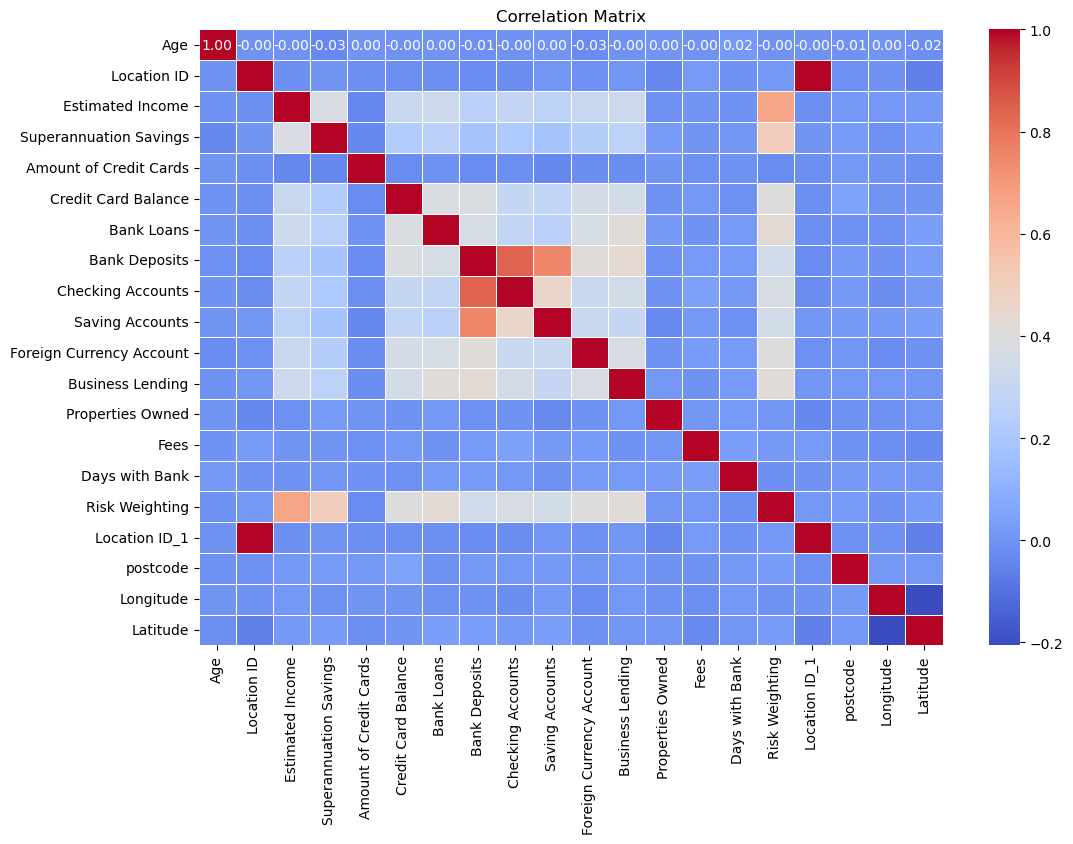

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns
numeric_cols = merged_dataset.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

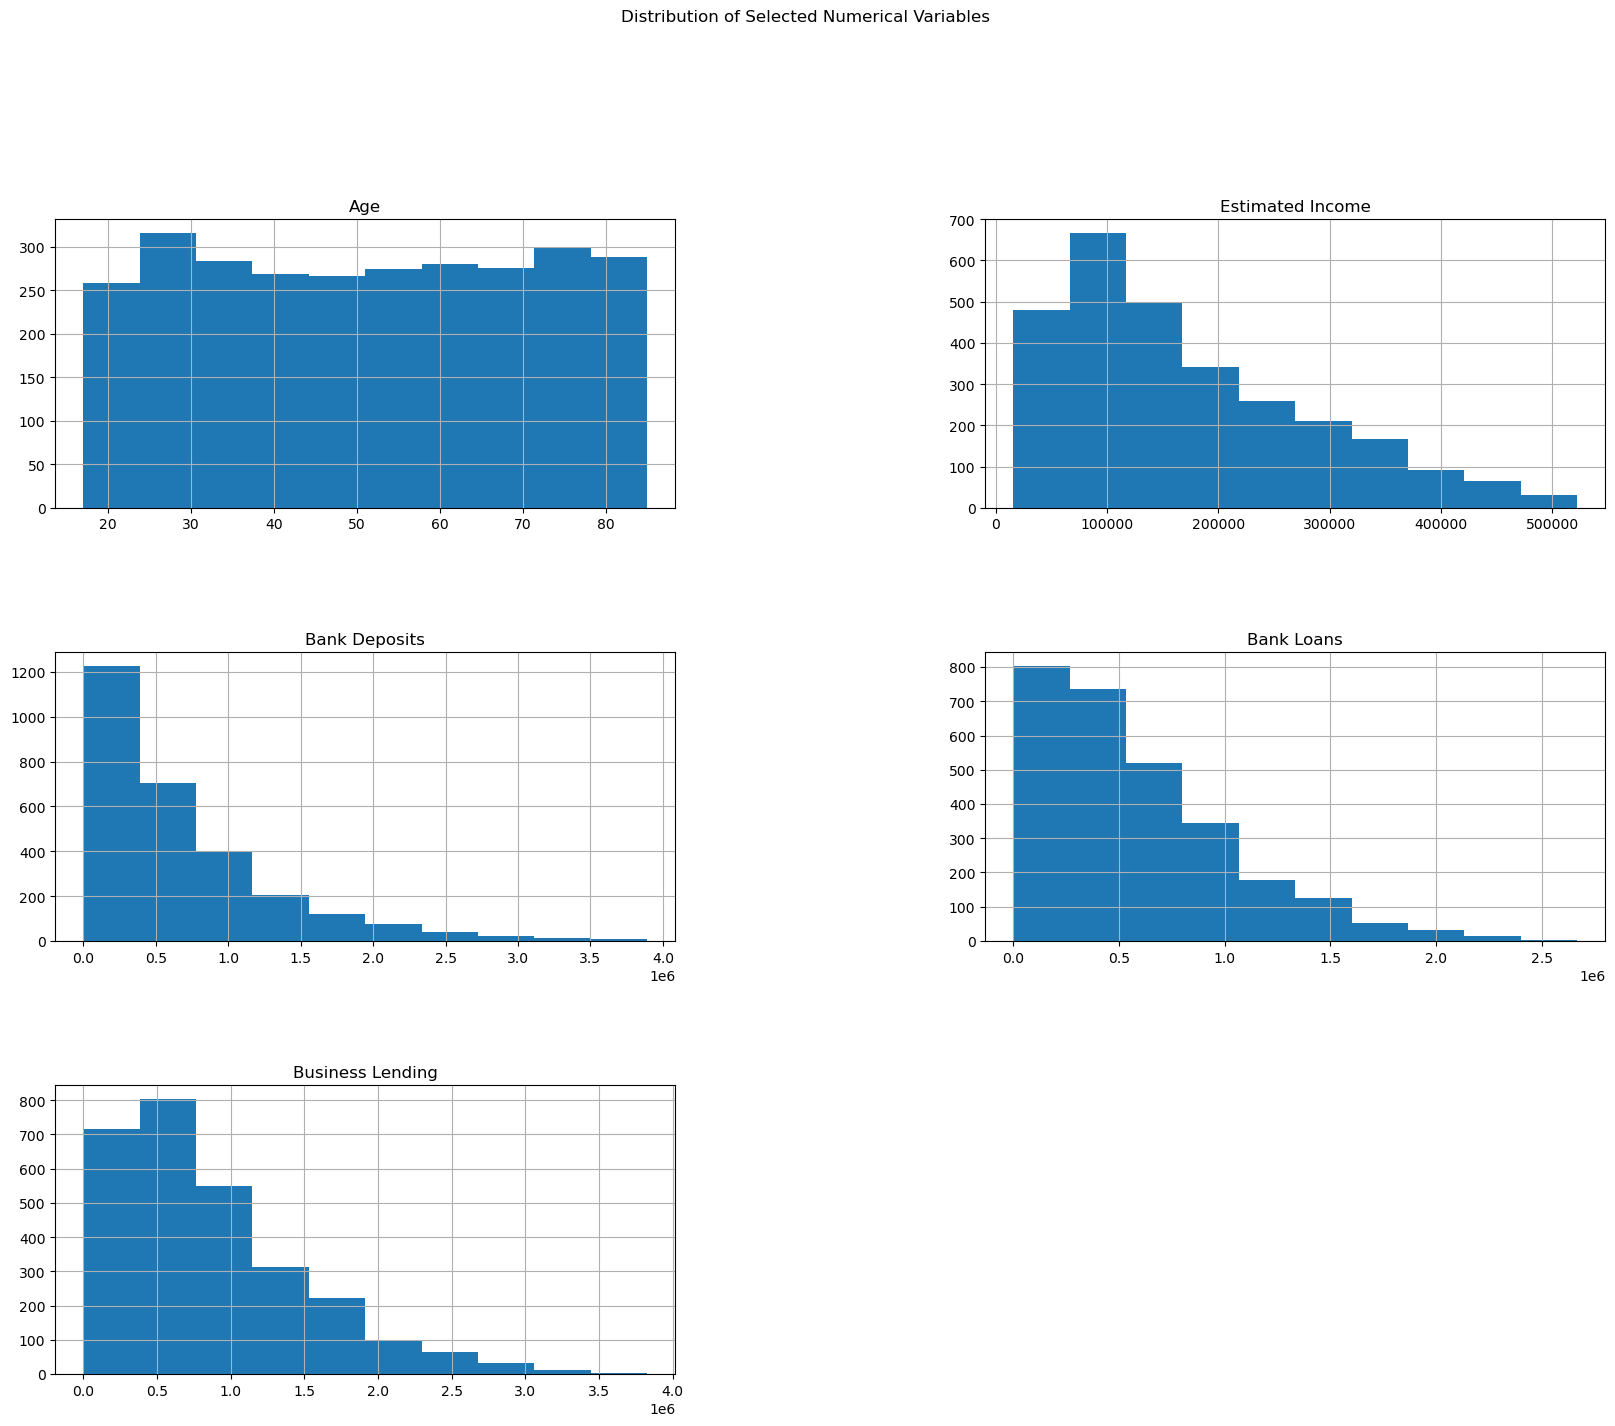

In [36]:
# Distribution of numerical variables
# Select a subset of numerical features
selected_features = ['Age', 'Estimated Income', 'Bank Deposits', 'Bank Loans', 'Business Lending']  

# Plot histograms for the selected features
merged_dataset[selected_features].hist(bins=10, figsize=(20, 15))

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # adjust subplot spacing
plt.suptitle('Distribution of Selected Numerical Variables', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()


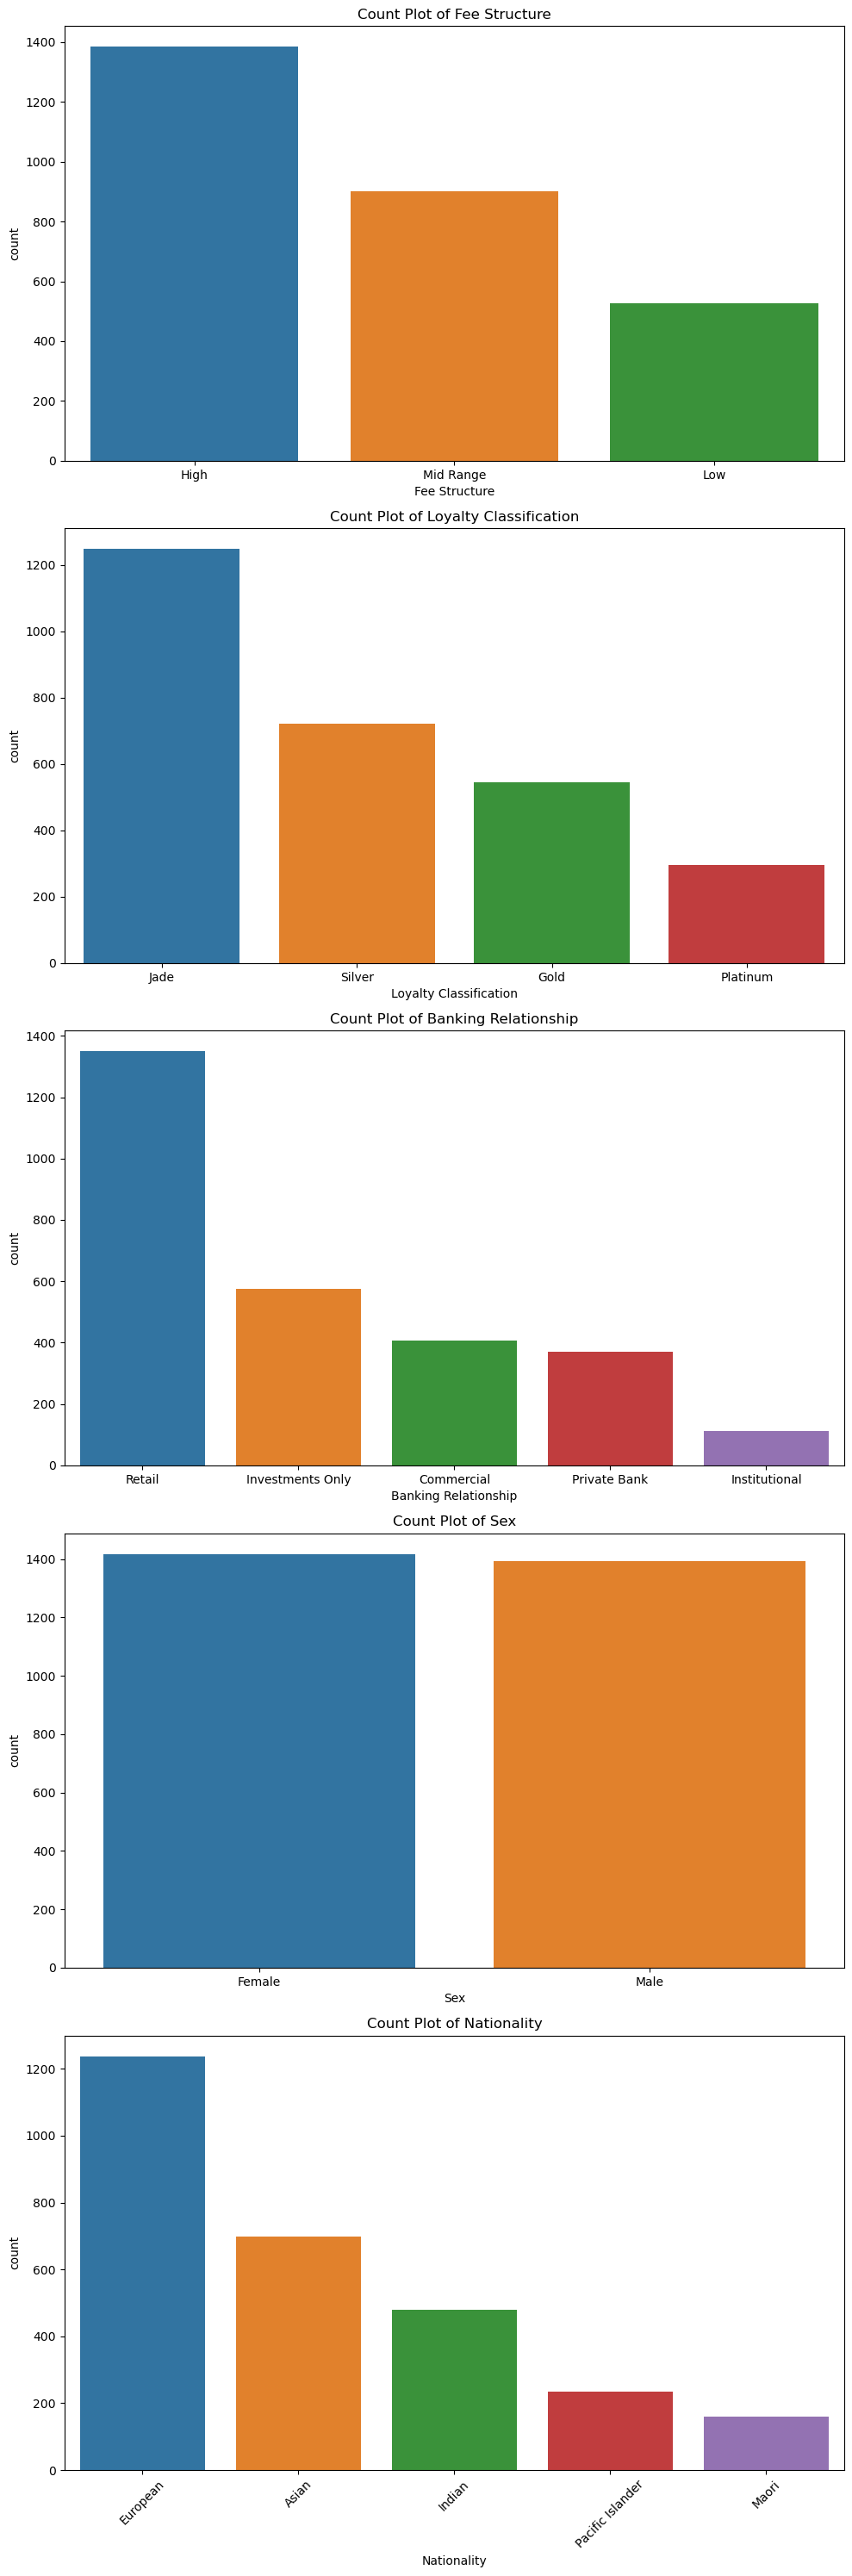

In [39]:
# Select a subset of categorical features
selected_features = ['Fee Structure', 'Loyalty Classification', 'Banking Relationship', 'Sex', 'Nationality']  

# Create subplots
fig, axs = plt.subplots(len(selected_features), figsize=(10, 6*len(selected_features)))

for i, feature in enumerate(selected_features):
    sns.countplot(x=feature, data=merged_dataset, order=merged_dataset[feature].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Feature Engineering

In [40]:
#Libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [41]:
# Extracting date features

merged_dataset['Joined_Bank_month'] = merged_dataset['Joined Bank'].dt.month
merged_dataset['Joined_Bank_year'] = merged_dataset['Joined Bank'].dt.year
merged_dataset['Last_Contact_month'] = merged_dataset['Last Contact'].dt.month
merged_dataset['Last_Contact_year'] = merged_dataset['Last Contact'].dt.year
merged_dataset['Last_Meeting_month'] = merged_dataset['Last Meeting'].dt.month
merged_dataset['Last_Meeting_year'] = merged_dataset['Last Meeting'].dt.year

In [42]:
# Total Financial Assets

# Define the financial assets
financial_assets = ['Superannuation Savings', 'Amount of Credit Cards', 'Bank Loans', 'Bank Deposits']

# Calculate the total financial assets
merged_dataset['Total_Assets'] = merged_dataset[financial_assets].sum(axis=1)

In [43]:
# Interaction Terms

# Create 'Credit_Utilization_Ratio' with protection against division by zero
merged_dataset['Credit_Utilization_Ratio'] = np.where(merged_dataset['Amount of Credit Cards'] != 0, 
                                                      merged_dataset['Credit Card Balance'] / merged_dataset['Amount of Credit Cards'], 
                                                      0)


In [44]:
# Binning Income

income_bins = [0, 20000, 50000, 100000, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']
merged_dataset['Income_Category'] = pd.cut(merged_dataset['Estimated Income'], bins=income_bins, labels=income_labels)


In [45]:
# Missing Value Imputation
numeric_features = merged_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = merged_dataset.select_dtypes(include=['object']).columns

In [46]:
# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [47]:
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [48]:
# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [49]:
# Fit and transform the dataset
processed_data = preprocessor.fit_transform(merged_dataset)

In [50]:
merged_dataset.head()

,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,Last Contact,...,City,Joined_Bank_month,Joined_Bank_year,Last_Contact_month,Last_Contact_year,Last_Meeting_month,Last_Meeting_year,Total_Assets,Credit_Utilization_Ratio,Income_Category
0,Margaret Carroll,24,Male,313,1996-06-17,Shawn Long,European,Engineer II,Carl Anderson,2016-07-17,...,Nakuru,6,1996,7,2016,9,2015,2137465,1346.0,Very High
1,Joshua Webb,34,Male,501,1993-09-08,Douglas Tucker,European,Web Developer I,Carl Anderson,2015-11-28,...,Nyeri,9,1993,11,2015,12,2015,2592176,8968.0,Very High
2,Kevin Ellis,82,Male,899,2012-03-25,Anthony Simpson,European,Computer Systems Analyst II,Fred Bryant,2015-08-20,...,Kilifi,3,2012,8,2015,8,2015,650147,557.0,Very High
3,Victor Moreno,29,Male,2147,1998-11-23,Frank Brown,European,Quality Control Specialist,Peter Castillo,2015-08-15,...,Trans Nzoia,11,1998,8,2015,10,2015,2440276,7774.0,Very High
4,Louis Ramirez,45,Male,2764,1995-01-01,Shawn Cook,European,Office Assistant I,Ernest Knight,2015-10-09,...,Kericho,1,1995,10,2015,7,2015,2245114,1898.0,Very High


## Customer Segmentation

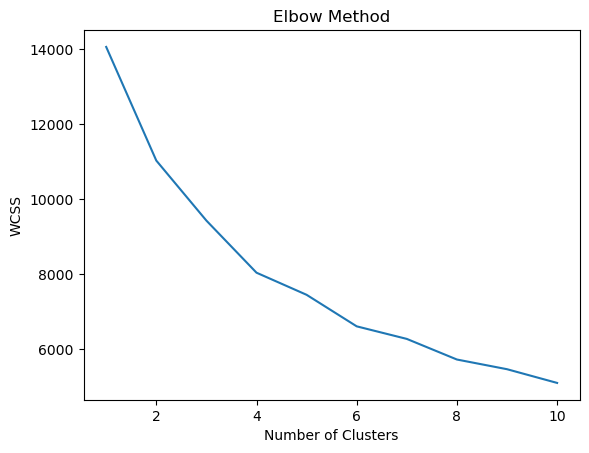

,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
0,31.690421,137459.536215,1.209112,4.378432e+05,4.729551e+05
1,68.232932,148932.123159,1.000000,4.697696e+05,4.755625e+05
2,49.596050,289593.947935,1.385996,1.140000e+06,1.445739e+06
3,58.349693,139511.150307,2.421779,4.660015e+05,4.911477e+05


In [52]:
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suppress warnings
warnings.filterwarnings('ignore')

# Select relevant features for segmentation
segmentation_data = merged_dataset[['Age', 'Estimated Income', 'Amount of Credit Cards', 'Bank Loans', 'Bank Deposits']]

# Preprocess data (scaling)
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Determine optimal number of clusters (k) using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (k)
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Analyze segmentation results
segment_means = segmentation_data.groupby('Cluster').mean()

# Display the segment_means table in a more readable format
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(segment_means)


## Interpretation and Profiling

Mean Values of Features for Each Cluster:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
0,31.690421,137459.536215,1.209112,4.378432e+05,4.729551e+05
1,68.232932,148932.123159,1.000000,4.697696e+05,4.755625e+05
2,49.596050,289593.947935,1.385996,1.140000e+06,1.445739e+06
3,58.349693,139511.150307,2.421779,4.660015e+05,4.911477e+05


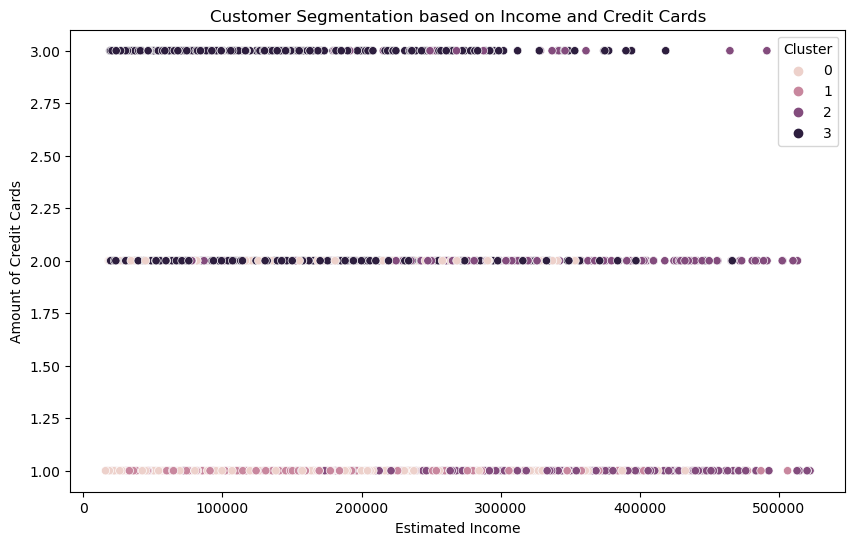


Segment 0 Description:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
0,31.690421,137459.536215,1.209112,437843.162383,472955.127336



Segment 1 Description:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
1,68.232932,148932.123159,1.0,469769.64257,475562.539491



Segment 2 Description:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
2,49.59605,289593.947935,1.385996,1.140000e+06,1.445739e+06



Segment 3 Description:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
3,58.349693,139511.150307,2.421779,466001.53681,491147.730061



Segment Comparison:


,Age,Estimated Income,Amount of Credit Cards,Bank Loans,Bank Deposits
Cluster,,,,,
1,36.542511,11472.586944,-0.209112,31926.480187,2607.412155
2,-18.636881,140661.824776,0.385996,670229.870895,970176.325859
3,8.753643,-150082.797629,1.035783,-673997.976655,-954591.135289


In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Feature Analysis
print("Mean Values of Features for Each Cluster:")
display(HTML(segment_means.to_html()))

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Income', y='Amount of Credit Cards', hue='Cluster', data=segmentation_data)
plt.title('Customer Segmentation based on Income and Credit Cards')
plt.xlabel('Estimated Income')
plt.ylabel('Amount of Credit Cards')
plt.legend(title='Cluster')
plt.show()

# Segment Description
for i in range(k):
    print(f"\nSegment {i} Description:")
    display(HTML(segment_means.loc[[i]].to_html()))

# Segment Comparison
print("\nSegment Comparison:")
segment_comparison = segmentation_data.groupby('Cluster').mean().diff().dropna()
display(HTML(segment_comparison.to_html()))



## Validation and Implementation

In [55]:
# Validation
# Monitor changes in business metrics to evaluate the effectiveness of segmentation
# Example: Calculate retention rates, conversion rates, and revenue generated from each segment over time

# Implementation
# Example: Personalized marketing campaigns targeting each segment
# Example: Customized product offerings tailored to the needs of each segment
# Example: Enhanced customer service experiences based on segment-specific preferences

# Let's assume we want to target marketing campaigns based on segmentation
# We will print out a sample marketing message for each segment

for i in range(k):
    print(f"\nSegment {i} Marketing Message:")
    if i == 0:
        print("Dear valued customer, as part of our exclusive premium services, "
              "we're delighted to offer you access to our VIP banking rewards program!")
    elif i == 1:
        print("Hello there! We noticed you're a part of our young professional segment. "
              "Check out our tailored financial planning services designed just for you!")
    elif i == 2:
        print("Hi! We understand the importance of savings and investments. "
              "Let us help you grow your wealth with our specialized investment advisory services.")
    elif i == 3:
        print("Greetings! Looking for flexible banking solutions? "
              "Explore our range of convenient banking options tailored to suit your lifestyle.")



Segment 0 Marketing Message:
Dear valued customer, as part of our exclusive premium services, we're delighted to offer you access to our VIP banking rewards program!

Segment 1 Marketing Message:
Hello there! We noticed you're a part of our young professional segment. Check out our tailored financial planning services designed just for you!

Segment 2 Marketing Message:
Hi! We understand the importance of savings and investments. Let us help you grow your wealth with our specialized investment advisory services.

Segment 3 Marketing Message:
Greetings! Looking for flexible banking solutions? Explore our range of convenient banking options tailored to suit your lifestyle.
